# Stock market analysis

This notebook illustrates how to retrieve historical stock prices
from [Yahoo finance](https://finance.yahoo.com), and make basic visualizations and analyses.

Libraries required in the rest of the notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import yfinance as yf


import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
%matplotlib inline  
import numpy as np

from scipy import stats

yf.pdr_override()

Retrieve historical data for a stock. In the example below, we collect data for "Google". Different stocks can be selected by simply changing the acronym

In [2]:
stock = 'DIS'
# start_date = '2016-01-01'    
# end_date = '2016-04-01' 
start_date = '2020-01-01'    
end_date = '2020-04-01' 
data = yf.download(stock, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
#print (data)

In [4]:
dates = []
open_value = []
close_value = []
for c in data.iterrows():
    dates.append(c[0].date())
    open_value.append(float(c[1][0]))
    close_value.append(float(c[1][3]))

Visualize the time series of the price of the stock at the opening of the trading (in US dollars), and the the price of the stock at the closing of the trading (in US dollars).

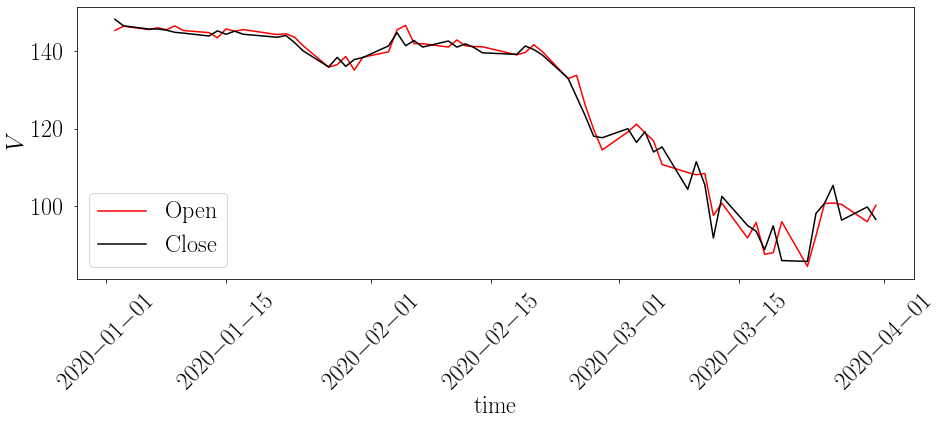

In [5]:
##visualize time series

plt.figure(figsize=(15,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('time')
plt.ylabel('$V$')


    

plt.plot(dates, open_value, color = 'red', label='Open')
plt.plot(dates, close_value, color = 'black', label='Close')

plt.xticks(rotation=45)

plt.legend(loc='lower left')

plt.show()

Visualization of the time series of the difference between closing and opening price of the stock.

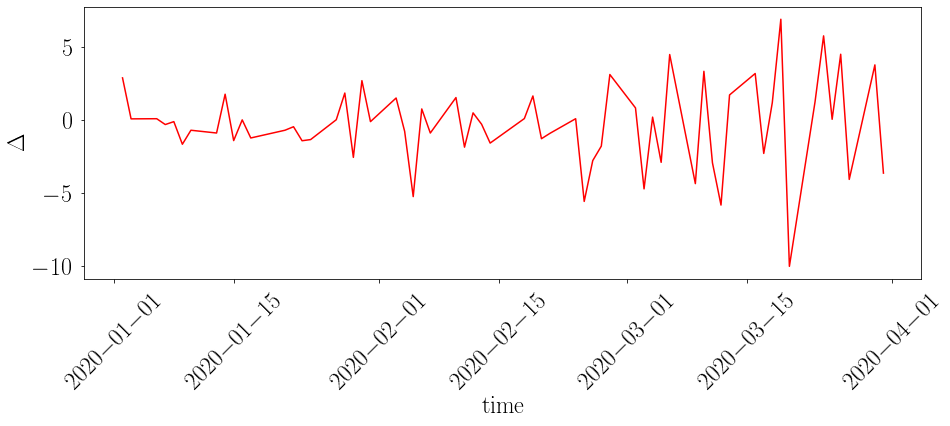

In [6]:
##visualize time series

plt.figure(figsize=(15,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('time')
plt.ylabel('$\Delta$')


diff_value = []
for i in range(0, len(dates)):
    diff_value.append(close_value[i] - open_value[i])

plt.plot(dates, diff_value, color = 'red', label='Difference')


plt.xticks(rotation=45)


plt.show()

Cumulative probability distribution of the difference between closing and opening price of the stock. The empirical distribution is fitted with a normal distribution.

In [7]:
##compute cumulative distribution
####################
def cumulative_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        norm = norm + 1.0
        x.append(n)
        cx.append(norm/float(len(sorted_data)+1.0))
    return x, cx
#####################

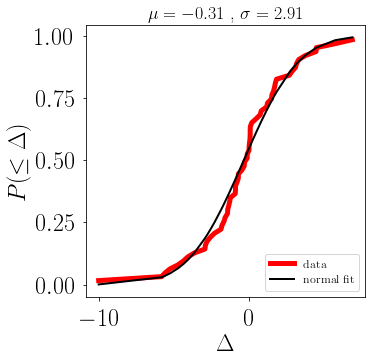

In [8]:
##visualize time series

plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('$\Delta$')
plt.ylabel('$P(\leq \Delta)$')


x, cx = cumulative_from_data (diff_value)
plt.plot(x, cx, color = 'red', lw = 5, label = 'data')


av = np.mean(diff_value)
sigma = np.std(diff_value)

plt.plot(x, stats.norm.cdf(x, loc=av, scale=sigma),'k-', lw=2, alpha=1.0, label='normal fit')
plt.legend(loc=4, fontsize=12)

title = '$ \mu = %.2f' %av + '$  , $\sigma = %.2f' % sigma +'$'
plt.title(title, fontsize=18)


plt.show()

Visualization of the return of the stock. Return is defined as

$$R = (V_c - V_o) / V_c$$

where $V_c$ and $V_o$ are respectively the stock price at closing and opening.

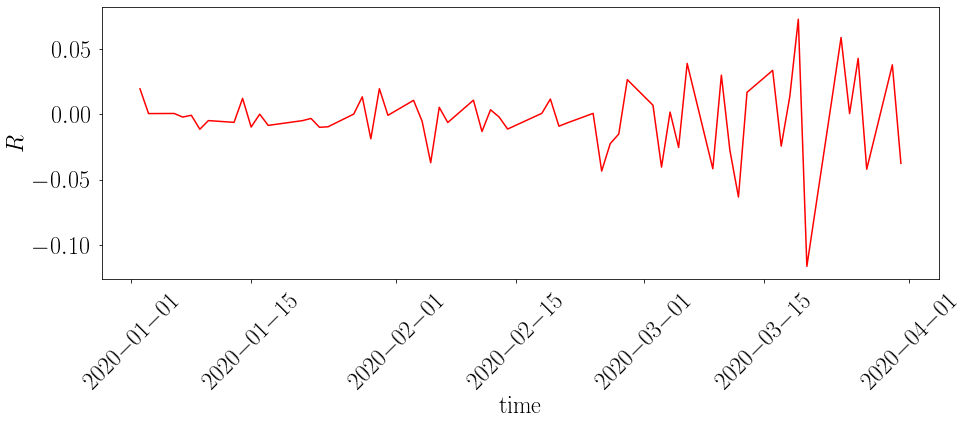

In [9]:
##visualize time series

plt.figure(figsize=(15,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('time')
plt.ylabel('$R$')


return_value = []
for i in range(0, len(dates)):
    return_value.append((close_value[i]-open_value[i])/close_value[i])

plt.plot(dates, return_value, color = 'red', label='Return')


plt.xticks(rotation=45)


plt.show()

Cumulative probability distribution of the return. The empirical distribution is fitted with a normal distribution.

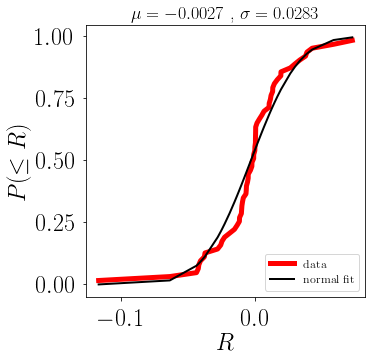

In [10]:
##visualize time series

plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('$R$')
plt.ylabel('$P(\leq R)$')


x, cx = cumulative_from_data (return_value)
plt.plot(x, cx, color = 'red', lw = 5, label = 'data')


av = np.mean(return_value)
sigma = np.std(return_value)

plt.plot(x, stats.norm.cdf(x, loc=av, scale=sigma),'k-', lw=2, alpha=1.0, label='normal fit')
plt.legend(loc=4, fontsize=12)

title = '$ \mu = %.4f' %av + '$  , $\sigma = %.4f' % sigma +'$'
plt.title(title, fontsize=18)


plt.show()

Correlation between two stocks. We retrieve data for a second stock, Apple in the example below.

In [11]:
stock = 'AAPL'    
# start_date = '2016-01-01'    
# end_date = '2016-04-01' 
start_date = '2020-01-01'    
end_date = '2020-04-01' 

data_aapl = yf.download(stock, start=start_date, end=end_date) 

[*********************100%***********************]  1 of 1 completed


In [12]:
dates_aapl = []
open_value_aapl = []
close_value_aapl = []
for c in data_aapl.iterrows():
    dates_aapl.append(c[0].date())
    open_value_aapl.append(float(c[1][0]))
    close_value_aapl.append(float(c[1][3]))

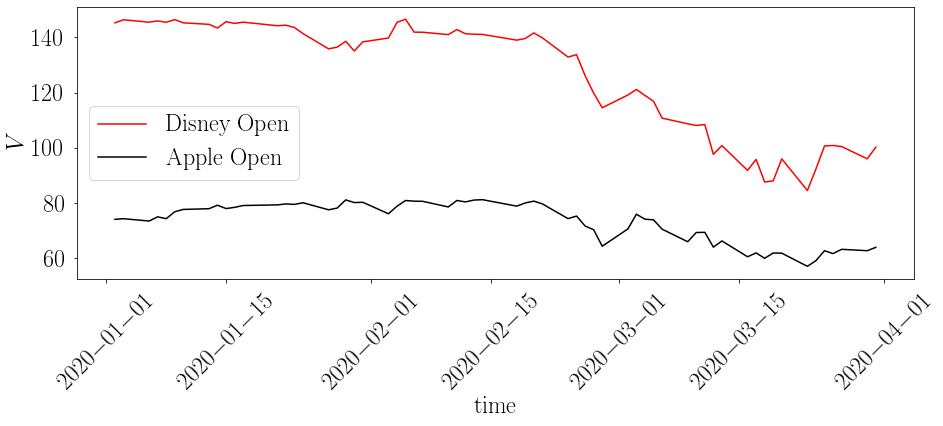

In [13]:
##visualize time series

plt.figure(figsize=(15,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('time')
plt.ylabel('$V$')


    

plt.plot(dates, open_value, color = 'red', label='Disney Open')
plt.plot(dates_aapl, open_value_aapl, color = 'black', label='Apple Open')

plt.xticks(rotation=45)

plt.legend(loc='center left')

plt.show()

We construct two lists with opening prices of the two stocks in the same day.

In [14]:
corr_value_goog = {}
corr_value_aapl = {}

for i in range (0, len(dates)):
    d = dates[i]
    corr_value_goog[d] = float(open_value[i])
    
for i in range (0, len(dates_aapl)):
    d = dates_aapl[i]
    corr_value_aapl[d] = float(open_value_aapl[i])


 
g = []
a = []
for d in corr_value_goog:
    if d in corr_value_aapl:
        g.append(corr_value_goog[d])
        a.append(corr_value_aapl[d])
        
        
        
slope, intercept, r_value, p_value, std_err = stats.linregress(g,a)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)

alpha :  30.57300700517259
beta :  0.33697660494557524
correlation coefficient :  0.9359799348506578


Scatter plot of the opening price of the two stocks. Each point is a day, the two coordinates are given by the opening prices of the stocks in that day.

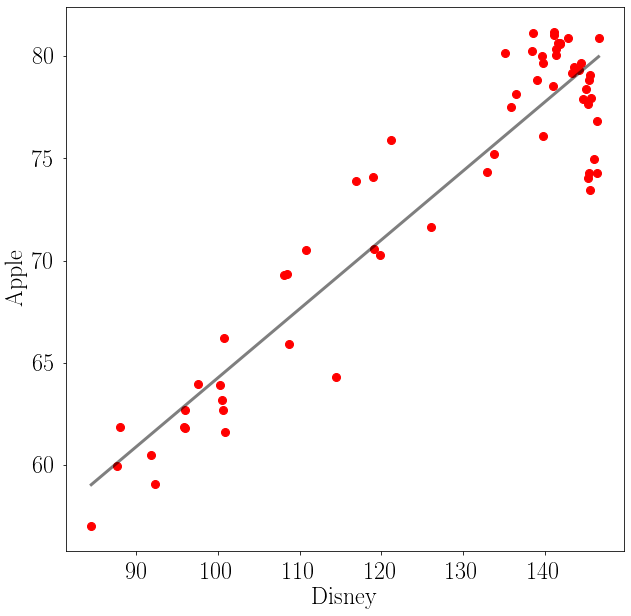

In [15]:
plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('Disney')
plt.ylabel('Apple')


    

plt.plot(g, a, lw =0, marker = 'o', markersize=8,  color = 'red')

best_fit_x = np.arange(min(g), max(g), 0.01)
best_fit_y = intercept + slope * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='black', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)




plt.show()

In [16]:
corr_value_goog = {}
corr_value_aapl = {}

for i in range (0, len(dates)):
    d = dates[i]
    corr_value_goog[d] = float(open_value[i] - close_value[i]) / float(close_value[i])
    
for i in range (0, len(dates_aapl)):
    d = dates_aapl[i]
    corr_value_aapl[d] = float(open_value_aapl[i] - close_value_aapl[i]) / float(close_value_aapl[i])


g = []
a = []
for d in corr_value_goog:
    if d in corr_value_aapl:
        g.append(corr_value_goog[d])
        a.append(corr_value_aapl[d])
        
slope, intercept, r_value, p_value, std_err = stats.linregress(g,a)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)

alpha :  -0.004697043039138449
beta :  0.5388464035839411
correlation coefficient :  0.6407580981499806


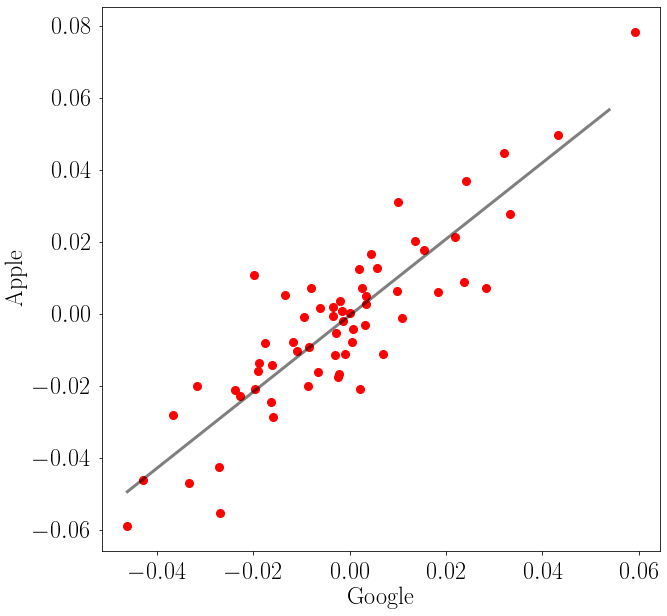

In [17]:
plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.xlabel('Google')
plt.ylabel('Apple')


    

plt.plot(g, a, lw =0, marker = 'o', markersize=8,  color = 'red')


best_fit_x = np.arange(min(g), max(g), 0.01)
best_fit_y = intercept + slope * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='black', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)




plt.show()